In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [2]:
filename = '../csv_detection_info/19_1, artrose.csv'
filename_clean = '../csv_detection_info_clean/19_1, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/19/1, artrose'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
216  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
217  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
218  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
219  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
220  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.11014955.251804644...      312      441   
1    1.2.276.0.7230010.3.0.3.5.1.11014957.181383882...      217      348   
2    1.2.276.0.82.1.1.1430.238141762.192.168.38.109...      927     1098   
3    1.2.276.0.82.1.1.1430.238141762.192.168.38.109...      786     1022   
4    1.2.276.0.82.1.1.1430.238141762.192.168.38.113...      798     1033   
..                                                 ...      ...      ...   
216  1.3.51.0.7.841872214.25368.61774.44809.24877.5...     1173     1365   
217  1.3.51.0.7.89554013.55820.31052.32897.55239.47...      643      768   
218  1.3.51.0.7.981498454.33743.4160.35359.21677.59...      838      989   
219            1.3.51.5156.4345.20190108.1145618.1.dcm      813     1010   
220  172.177.1126.1225.1148.1223.20191128150716.32.dcm        0        0   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0        526      655    0.999993    19          1    1, artrose  
1        679      809    0.999998    19          1    1, artrose  
2       1502     1672    0.999997    19          1    1, artrose  
3       1367     1604    0.936387    19          1    1, artrose  
4       1630     1866    0.985516    19          1    1, artrose  
..       ...      ...         ...   ...        ...           ...  
216     1425     1618    0.999335    19          1    1, artrose  
217      526      651    0.999991    19          1    1, artrose  
218     1567     1718    0.999999    19          1    1, artrose  
219      945     1143    0.995927    19          1    1, artrose  
220        0        0    0.000000    19          1    1, artrose  

[221 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [5]:
detection_df[detection_df.confidence < 0.5]

base_path  \
53   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
56   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
64   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
66   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
154  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
220  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
53            1.2.276.0.95.31602.20191008.144613.0.dcm      240      465   
56            1.2.276.0.95.31602.20191008.145111.0.dcm      384      553   
64   1.2.392.200036.9107.500.220.18951.20190719.181...     1262     1391   
66   1.2.392.200036.9107.500.220.18951.20190919.180...        0        0   
154  1.3.51.0.7.14116457829.35693.22857.37811.41715...        0        0   
220  172.177.1126.1225.1148.1223.20191128150716.32.dcm        0        0   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
53       685      908    0.391264    19          1    1, artrose  
56       727      895    0.492320    19          1    1, artrose  
64       526      654    0.420134    19          1    1, artrose  
66         0        0    0.000000    19          1    1, artrose  
154        0        0    0.000000    19          1    1, artrose  
220        0        0    0.000000    19          1    1, artrose

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

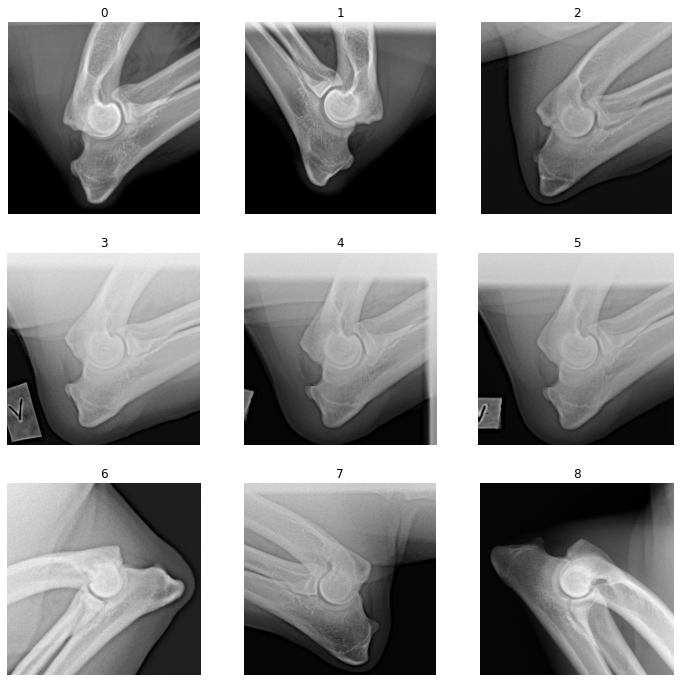

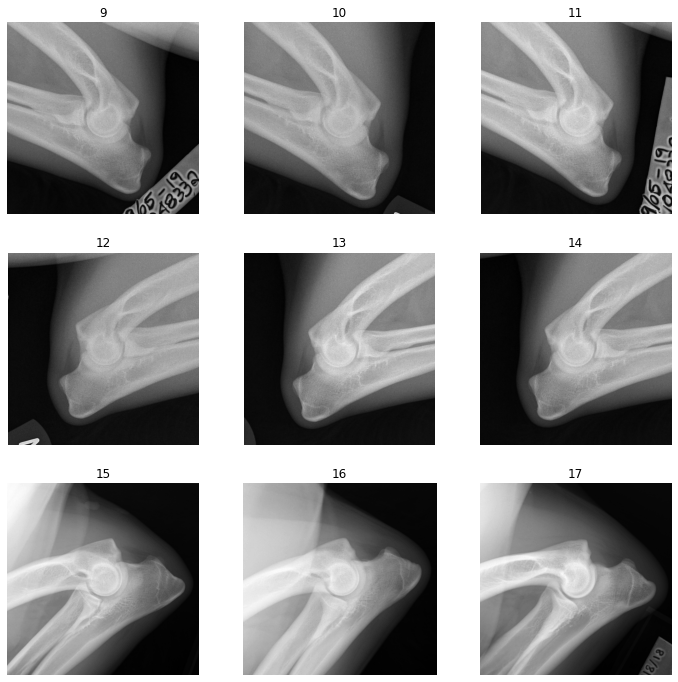

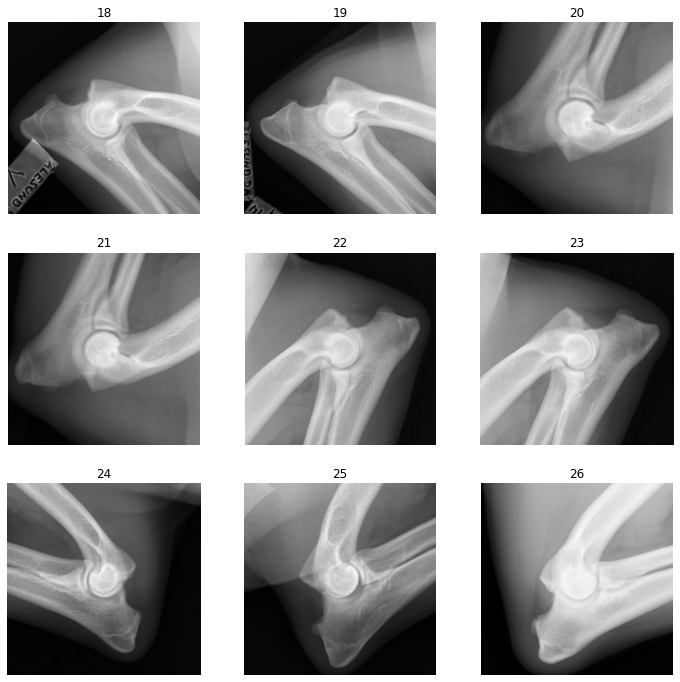

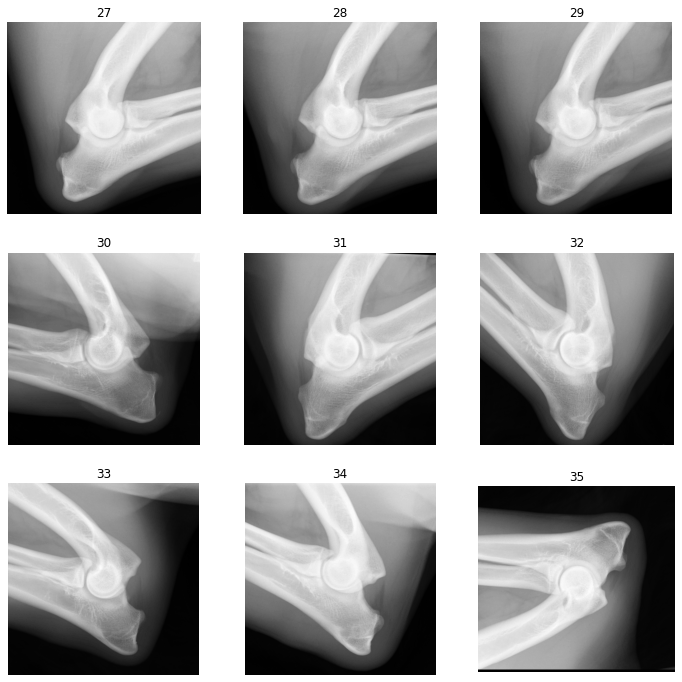

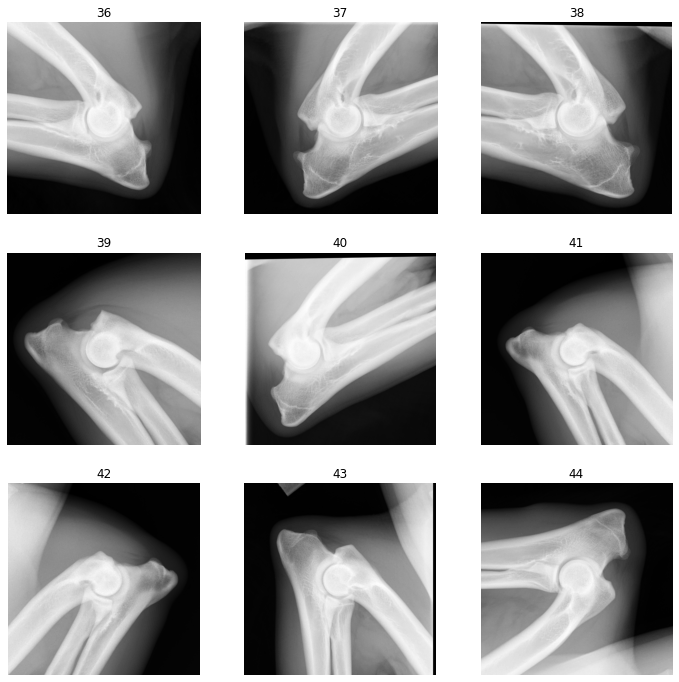

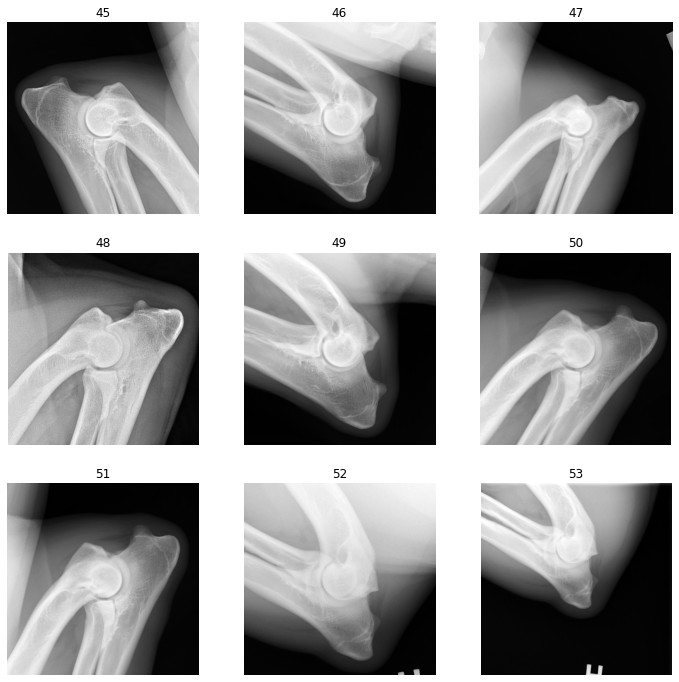

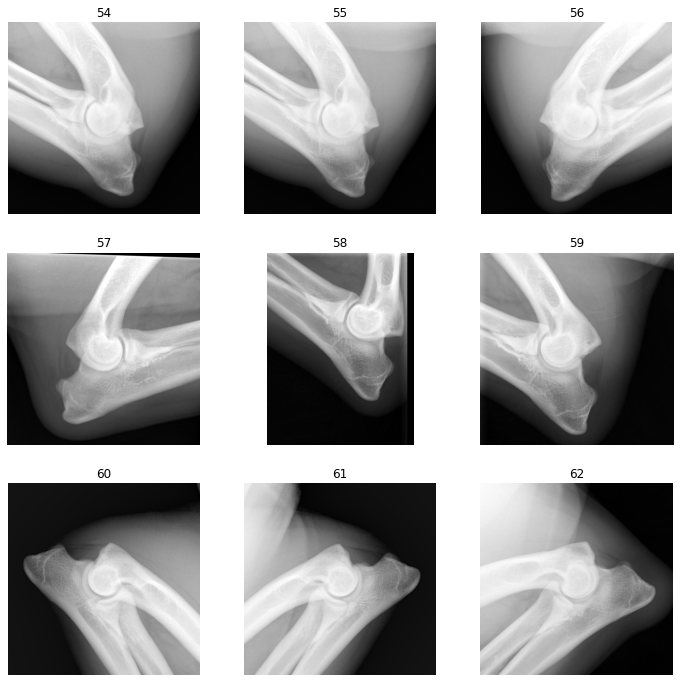

C:\NMBU\TEMP\ipykernel_14280\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_14280\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


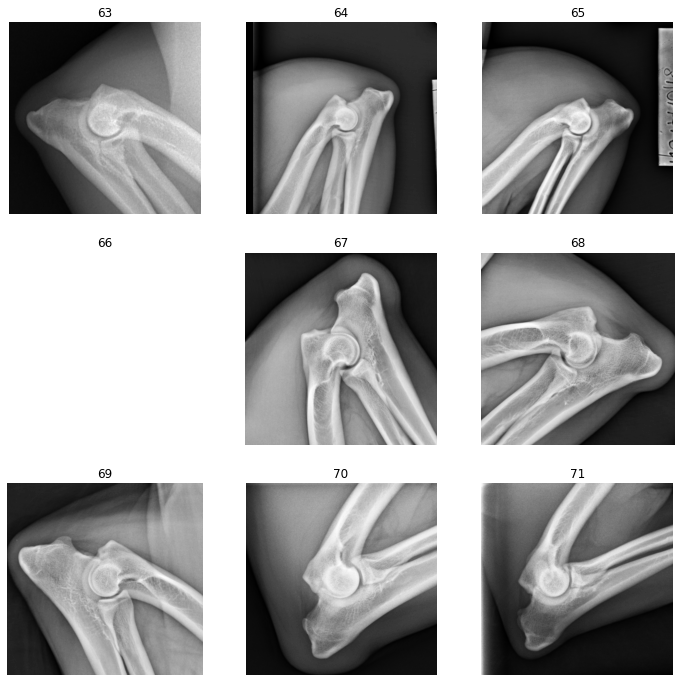

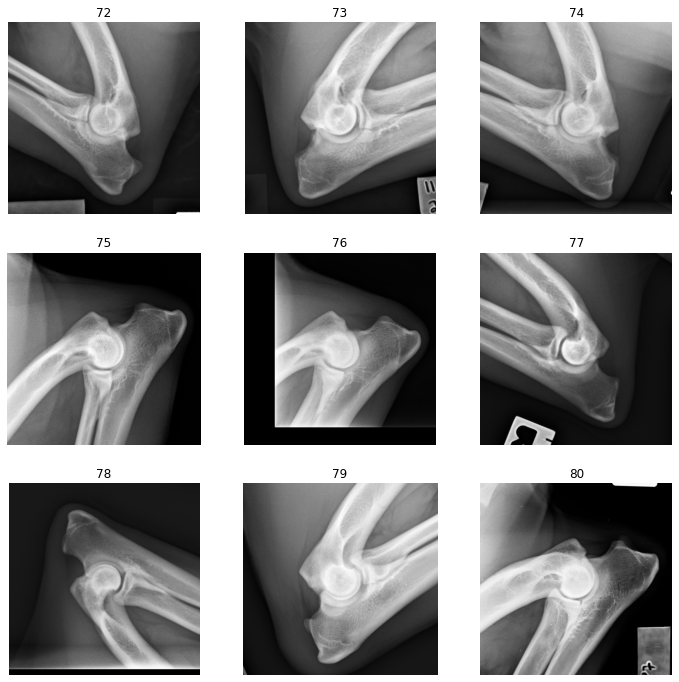

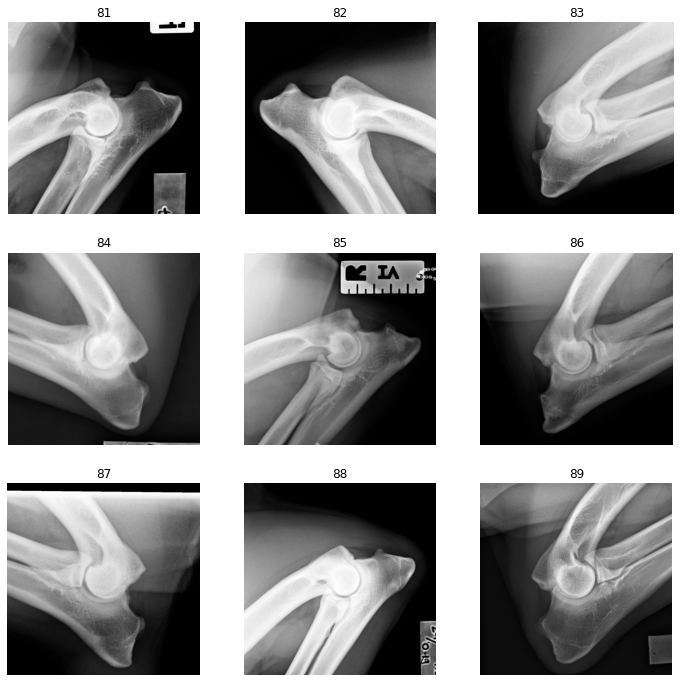

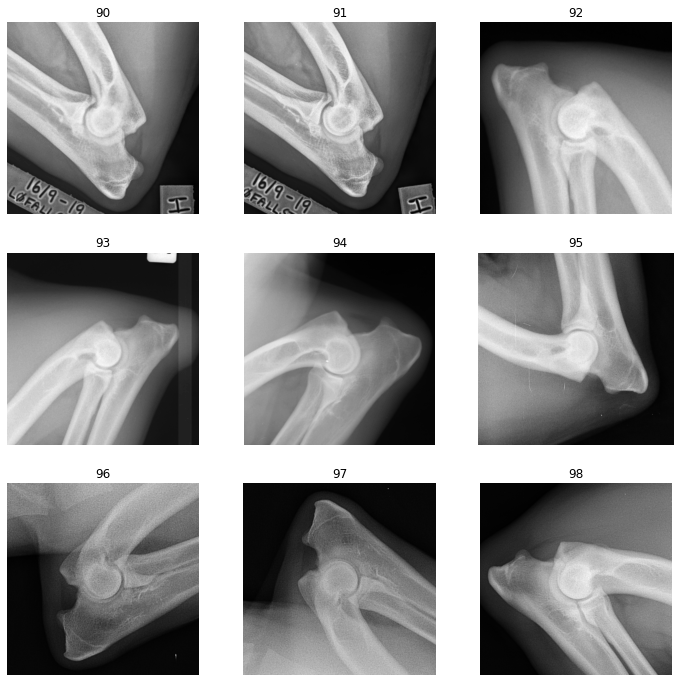

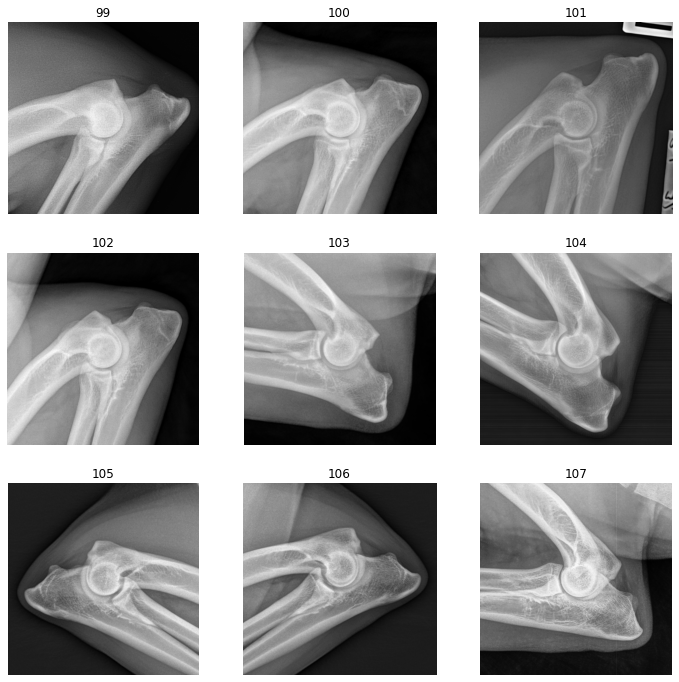

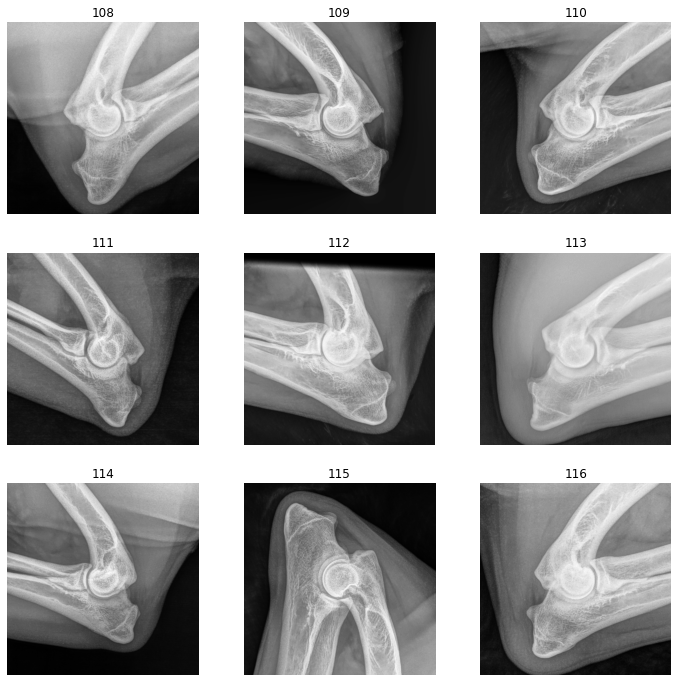

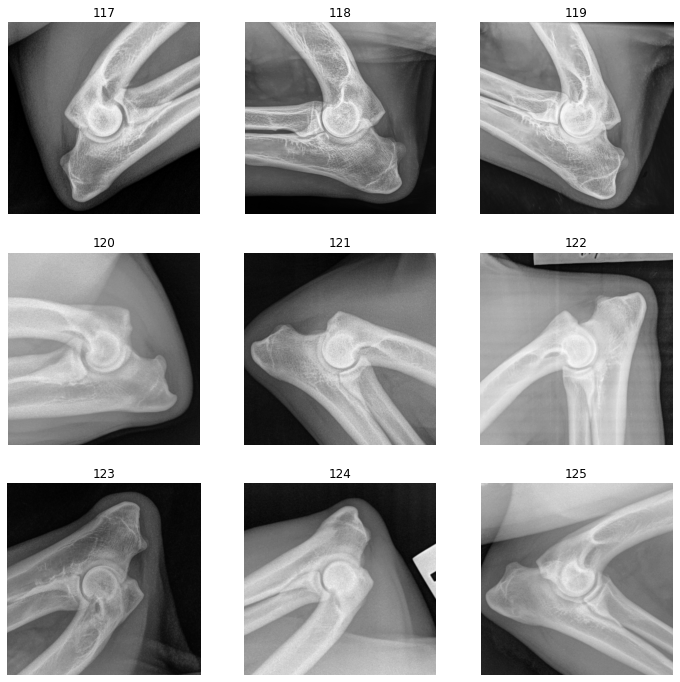

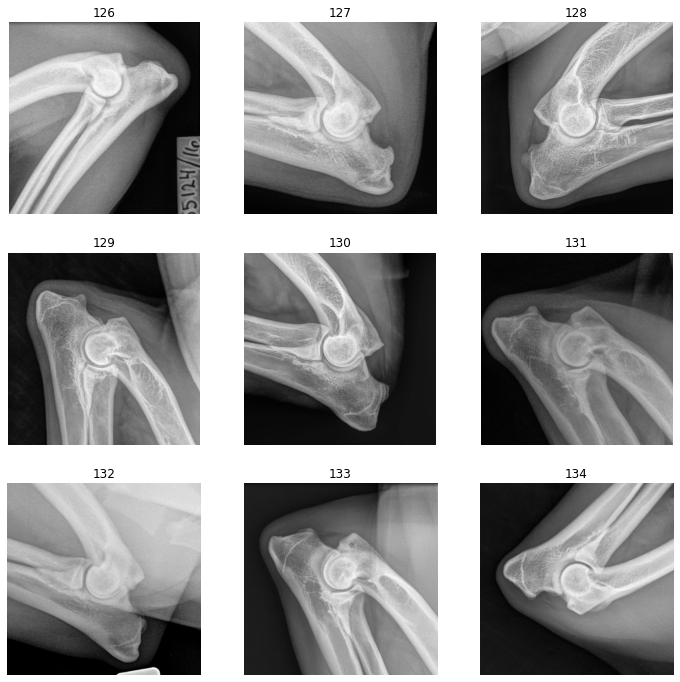

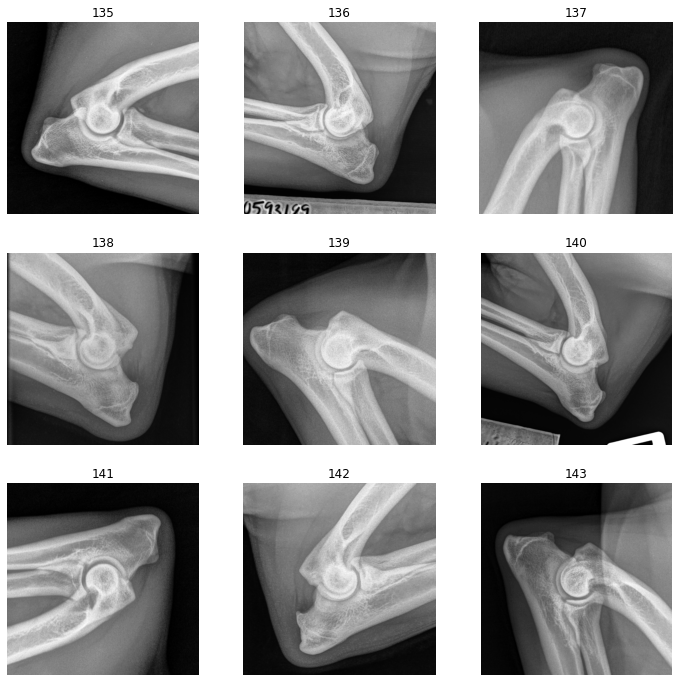

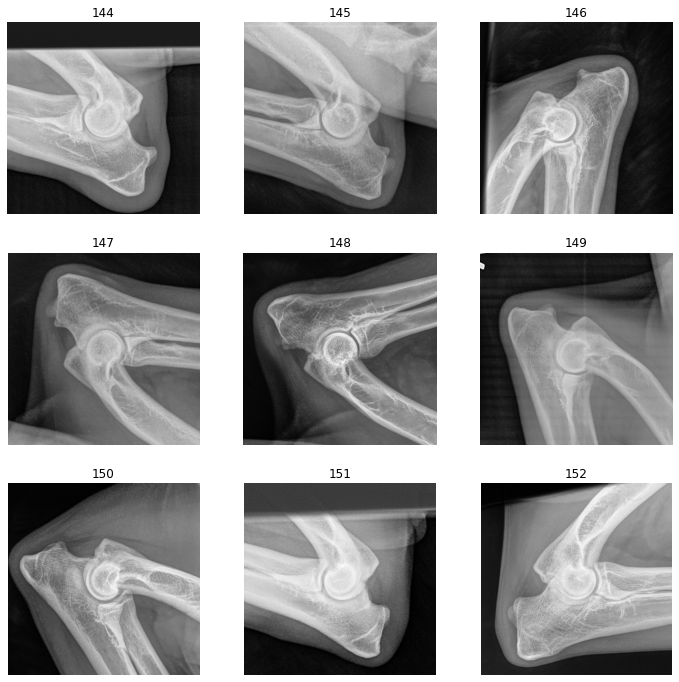

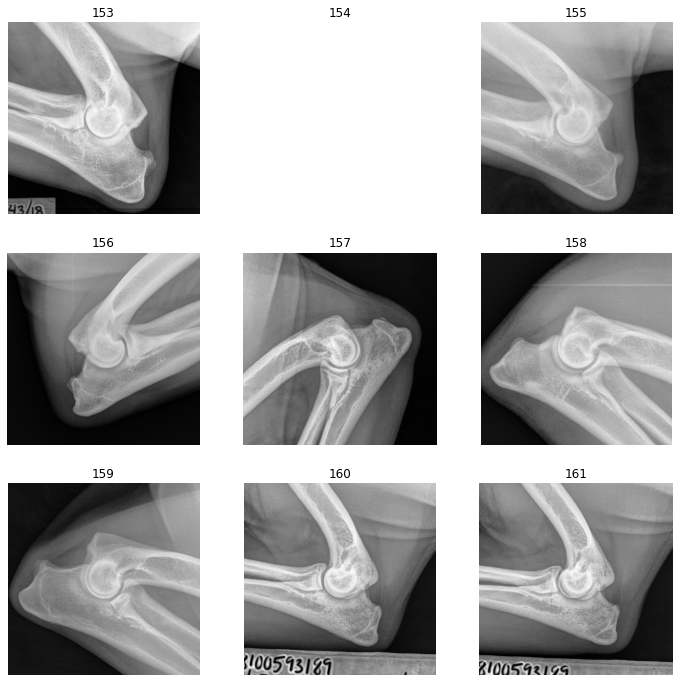

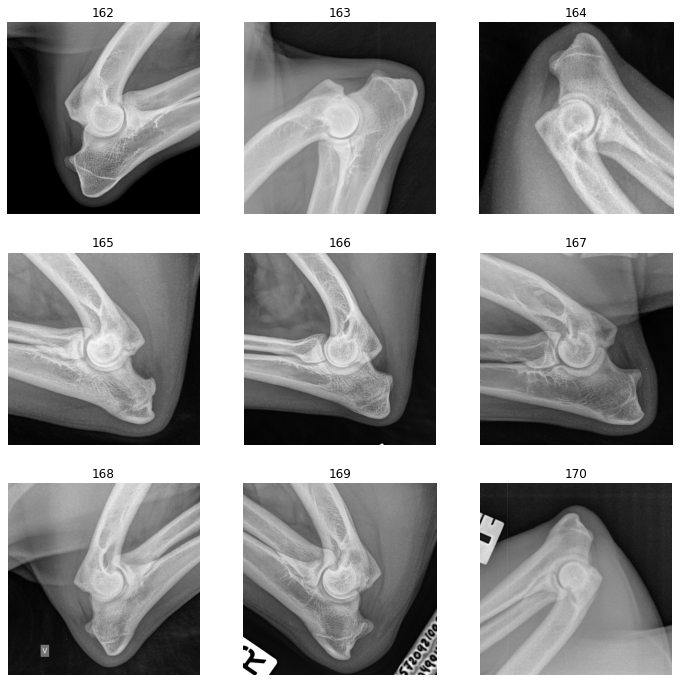

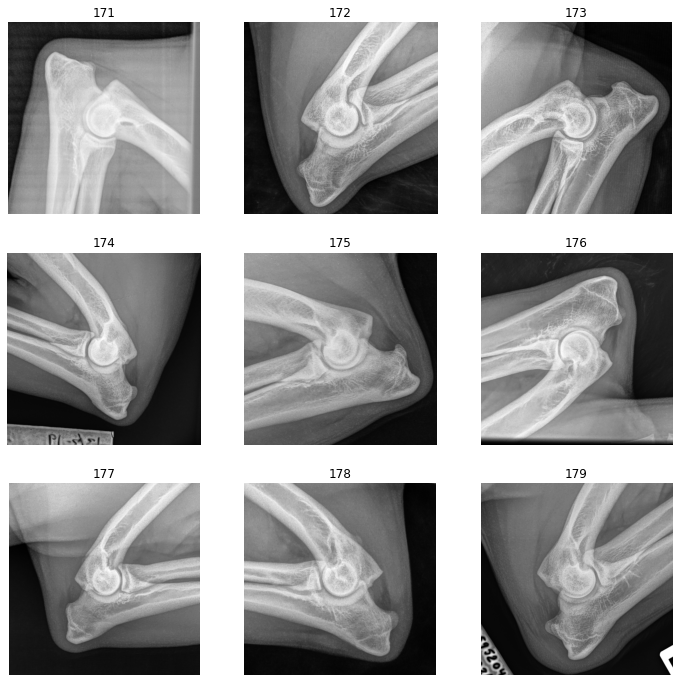

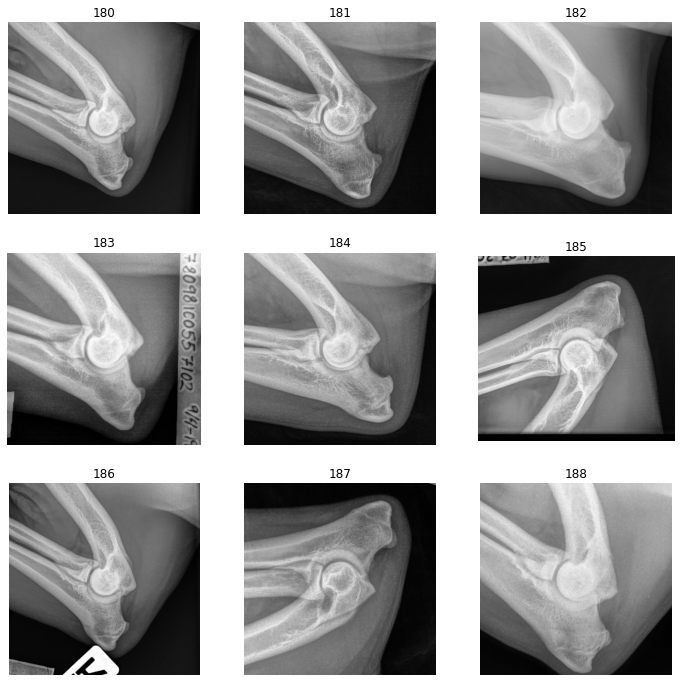

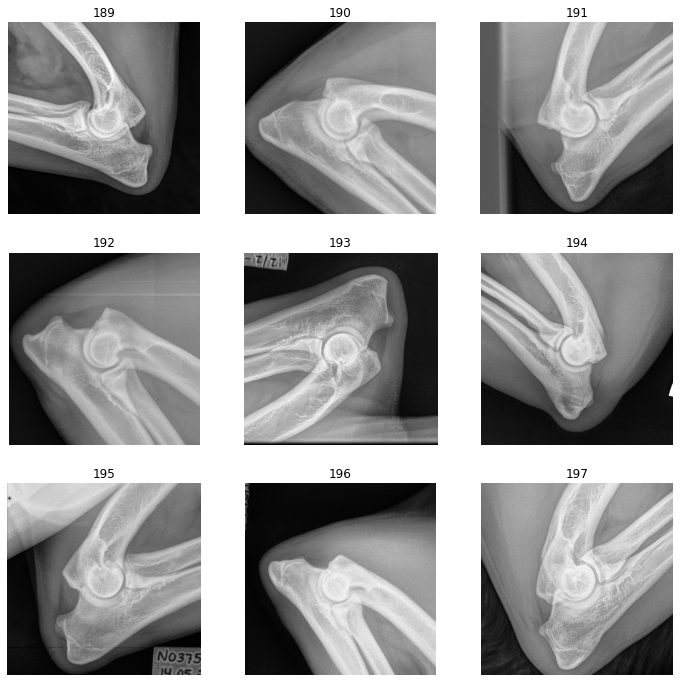

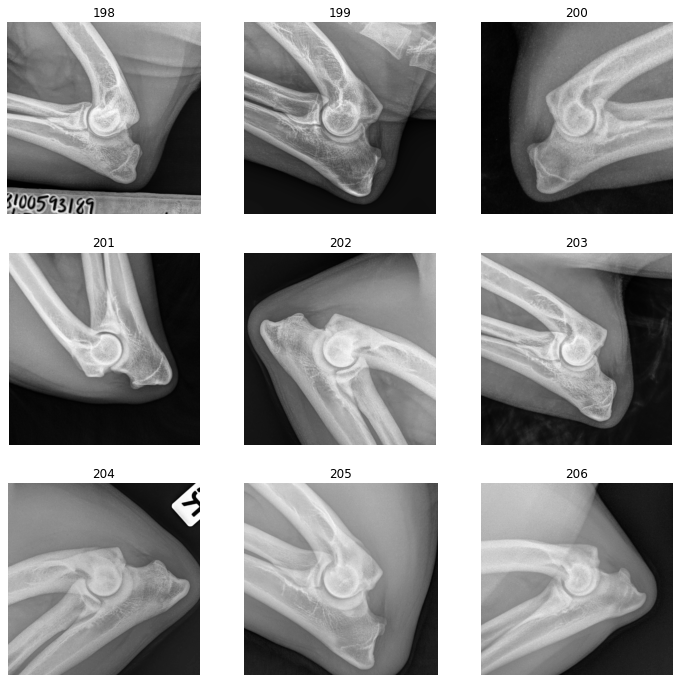

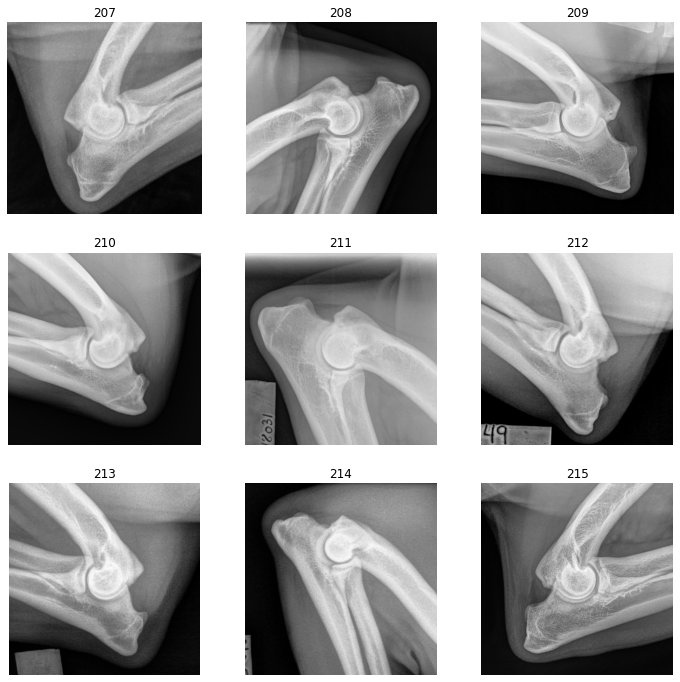

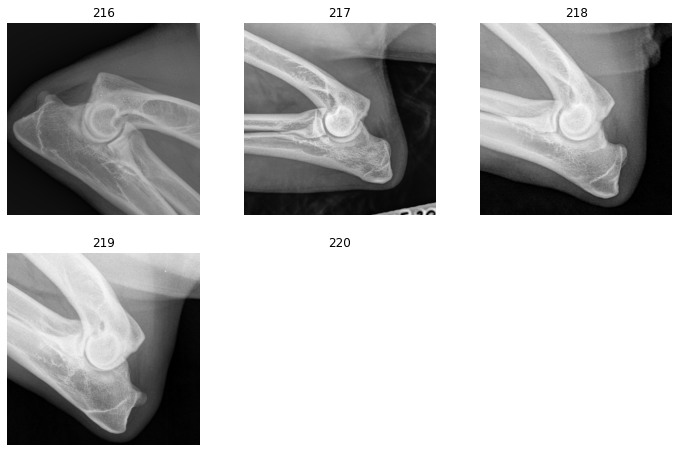

In [6]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [7]:
remove_indice = [66,154,220]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
215  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
216  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
217  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
218  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
219  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.11014955.251804644...      312      441   
1    1.2.276.0.7230010.3.0.3.5.1.11014957.181383882...      217      348   
2    1.2.276.0.82.1.1.1430.238141762.192.168.38.109...      927     1098   
3    1.2.276.0.82.1.1.1430.238141762.192.168.38.109...      786     1022   
4    1.2.276.0.82.1.1.1430.238141762.192.168.38.113...      798     1033   
..                                                 ...      ...      ...   
215  1.3.51.0.7.80933100.30110.38989.46765.49711.43...      669      808   
216  1.3.51.0.7.841872214.25368.61774.44809.24877.5...     1173     1365   
217  1.3.51.0.7.89554013.55820.31052.32897.55239.47...      643      768   
218  1.3.51.0.7.981498454.33743.4160.35359.21677.59...      838      989   
219            1.3.51.5156.4345.20190108.1145618.1.dcm      813     1010   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0        526      655    0.999993    19          1    1, artrose  
1        679      809    0.999998    19          1    1, artrose  
2       1502     1672    0.999997    19          1    1, artrose  
3       1367     1604    0.936387    19          1    1, artrose  
4       1630     1866    0.985516    19          1    1, artrose  
..       ...      ...         ...   ...        ...           ...  
215      433      572    0.999994    19          1    1, artrose  
216     1425     1618    0.999335    19          1    1, artrose  
217      526      651    0.999991    19          1    1, artrose  
218     1567     1718    0.999999    19          1    1, artrose  
219      945     1143    0.995927    19          1    1, artrose  

[218 rows x 10 columns]

In [8]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [9]:
new_detection_df.to_csv(filename_clean, index=False)